In [1]:
import pandas as pd
import os,sys, imp, glob
sys.path.append('./src/')
import doc_utils_clean as doc_utils
import defines
import numpy as np
import seaborn as sns

In [28]:
doc_utils.parse_doc(1,True)

1 Doc 619 sentences saved


In [30]:
doc_utils.doc_db.sort_values(by='doc_idx_from_name')

,path,file_name,doc_idx_from_name,par_count,sent_count,nar_sent_count
31,./tmp/01_aingimel3_lc.docx,01_aingimel3_lc.docx,1,205.000000,619.000000,268.000000
28,./tmp/02_aingimel12_lc.docx,02_aingimel12_lc.docx,2,NaN,NaN,NaN
23,./tmp/03_aingimel26_lc.docx,03_aingimel26_lc.docx,3,NaN,NaN,NaN
59,./tmp/04_nun2_lc.docx,04_nun2_lc.docx,4,NaN,NaN,NaN
43,./tmp/05_kafhey_23_lc.docx,05_kafhey_23_lc.docx,5,NaN,NaN,NaN
...,...,...,...,...,...,...
3,./tmp/59_samehalef11_Mor.docx,59_samehalef11_Mor.docx,59,NaN,NaN,NaN
29,./tmp/60_samehalef9_Mor.docx,60_samehalef9_Mor.docx,60,NaN,NaN,NaN
41,./tmp/61_samehalef7_Mor.docx,61_samehalef7_Mor.docx,61,NaN,NaN,NaN
35,./tmp/62_samehalef5_Mor.docx,62_samehalef5_Mor.docx,62,NaN,NaN,NaN


In [31]:
imp.reload(doc_utils)
doc_utils.save_docs_db()
doc_db =  pd.read_csv("./dataframes/doc_db.csv")
# doc_db.sort_values(by='doc_idx_from_name',inplace=True)
# doc_db.describe()
doc_db.sort_values(by='doc_idx_from_name')

Creating doc_db


,path,file_name,doc_idx_from_name
31,./tmp/01_aingimel3_lc.docx,01_aingimel3_lc.docx,1
28,./tmp/02_aingimel12_lc.docx,02_aingimel12_lc.docx,2
23,./tmp/03_aingimel26_lc.docx,03_aingimel26_lc.docx,3
59,./tmp/04_nun2_lc.docx,04_nun2_lc.docx,4
43,./tmp/05_kafhey_23_lc.docx,05_kafhey_23_lc.docx,5
...,...,...,...
3,./tmp/59_samehalef11_Mor.docx,59_samehalef11_Mor.docx,59
29,./tmp/60_samehalef9_Mor.docx,60_samehalef9_Mor.docx,60
41,./tmp/61_samehalef7_Mor.docx,61_samehalef7_Mor.docx,61
35,./tmp/62_samehalef5_Mor.docx,62_samehalef5_Mor.docx,62


In [10]:
doc_utils.doc_db=pd.read_csv("./dataframes/doc_db.csv")
doc_utils.get_dbIdx_by_docIdx(13)

Int64Index([12], dtype='int64')

In [16]:
doc_path = doc_utils.doc_db.loc[doc_utils.get_dbIdx_by_docIdx(29),'path'].values[0]
doc_path

'./tmp/02_aingimel12_lc.docx'

In [3]:
def concat_sent_dbs():
    sent_db = pd.concat([pd.read_csv(i,usecols=['is_nar','nar_idx','sent_len','is_client']) for i in glob.glob(os.path.join(os.path.join(os.getcwd(),defines.PATH_TO_DFS,"*_sent_db.csv")))])
    sent_db.reset_index(inplace=True,drop=True)
    return sent_db

In [4]:
sent_db = concat_sent_dbs()
sent_db

,is_nar,nar_idx,sent_len,is_client
0,0.000000,0.000000,7.000000,1
1,0.000000,0.000000,8.000000,0
2,0.000000,0.000000,318.000000,1
3,1.000000,1.000000,6.000000,1
4,1.000000,1.000000,90.000000,1
...,...,...,...,...
33231,0.000000,0.000000,86.000000,0
33232,0.000000,0.000000,45.000000,1
33233,0.000000,0.000000,130.000000,0
33234,0.000000,0.000000,7.000000,1


In [5]:
doc_stat_db = pd.DataFrame()

def get_doc_statistic(doc_idx):
    sent_db = pd.read_csv(os.path.join(os.getcwd(),defines.PATH_TO_DFS,"{:02d}_sent_db.csv".format(i)),usecols=['is_nar','nar_idx','sent_len','is_client'])
    nar_num = sent_db['nar_idx'].nunique()
    avrg_sent_len_nar = sent_db.query('is_nar == 1')['sent_len'].mean()
    groupby(['doc_idx'])['nar_idx'].nunique()
    del sent_db

In [6]:
sent_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33236 entries, 0 to 33235
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   is_nar     33236 non-null  float64
 1   nar_idx    33236 non-null  float64
 2   sent_len   33236 non-null  float64
 3   is_client  33236 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 1.0 MB


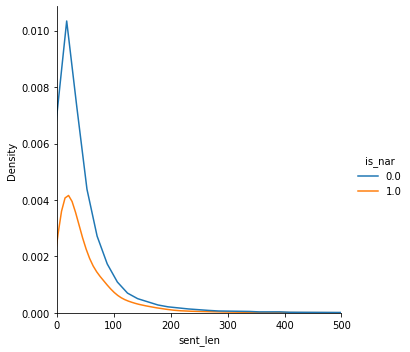

In [18]:
sent_len = sns.displot(data=sent_db, x='sent_len',hue='is_nar',kind='kde')
sent_len.set(xlim=(0, 500))

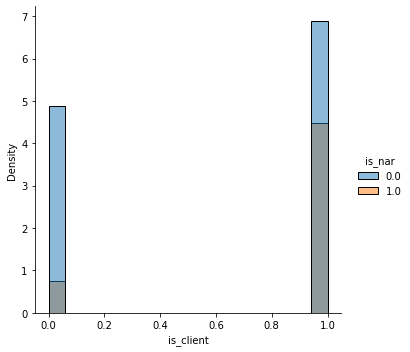

In [29]:
is_cl = sns.displot(data=sent_db, x='is_client',hue='is_nar',stat="density")

In [35]:
i= 2
sent_db = pd.read_csv(os.path.join(os.getcwd(),defines.PATH_TO_DFS,"{:02d}_sent_db.csv".format(i)))
curr_idx = doc_stat_db.shape[0]
doc_stat_db.loc[curr_idx,'dox_idx'] = i
doc_stat_db.loc[curr_idx,'sent_count'] = len(sent_db.index)
doc_stat_db.loc[curr_idx,'nar_count'] = sent_db['nar_idx'].nunique()
doc_stat_db.loc[curr_idx,'avr_sent_len_nar'] = sent_db.query('is_nar == 1')['sent_len'].mean()
doc_stat_db.loc[curr_idx,'avr_sent_len_not_nar'] = sent_db.query('is_nar == 0')['sent_len'].mean()
doc_stat_db.loc[curr_idx,'avr_nar_sent_count'] = sent_db.query('is_nar == 1').groupby('nar_idx').size().mean()
doc_stat_db.loc[curr_idx,'client_count'] = sent_db[sent_db['is_client'] == 1].shape[0]
doc_stat_db.loc[curr_idx,'therapist_count'] = sent_db[sent_db['is_client'] == 0].shape[0]
doc_stat_db.loc[curr_idx,'nar_client_count'] = sent_db[(sent_db['is_client'] == 1) & (sent_db['is_nar']==1)].shape[0]
doc_stat_db.loc[curr_idx,'nar_therapist_count'] = sent_db[(sent_db['is_client'] == 0) & (sent_db['is_nar']==1)].shape[0]
doc_stat_db.loc[curr_idx,'not_nar_client_count'] = sent_db[(sent_db['is_client'] == 1) & (sent_db['is_nar']==0)].shape[0]
doc_stat_db.loc[curr_idx,'not_nar_therapist_count'] = sent_db[(sent_db['is_client'] == 0) & (sent_db['is_nar']==0)].shape[0]



doc_stat_db

,dox_idx,sent_count,nar_count,avr_sent_len_nar,avr_sent_len_not_nar,avr_nar_sent_count,client_count,therapist_count,nar_client_count,nar_therapist_count,not_nar_client_count,not_nar_therapist_count
0,32.000000,253.000000,9.000000,108.630137,122.355556,9.125000,197.000000,56.000000,70.000000,3.000000,127.000000,53.000000
1,1.000000,618.000000,14.000000,51.171642,42.380000,20.615385,415.000000,203.000000,227.000000,41.000000,188.000000,162.000000
2,2.000000,186.000000,5.000000,299.333333,118.683616,2.250000,91.000000,95.000000,7.000000,2.000000,84.000000,93.000000


In [16]:
 sent_db.groupby('nar_idx').size()

nar_idx
0.000000     120
1.000000       9
2.000000       4
3.000000      13
4.000000      11
5.000000      35
6.000000       8
7.000000       2
8.000000       5
9.000000      17
10.000000     18
11.000000      3
12.000000     19
13.000000      3
14.000000      7
dtype: int64